# Olist Sales Analysis

## Introduction

Olist is a Brazilian e-commerce platform that connects small and medium-sized businesses to
customers across Brazil. The platform operates as a marketplace, where merchants can list
their products and services and customers can browse and purchase them online.

The Olist sales dataset available on Kaggle is a collection of anonymized data about orders
placed on the Olist platform between January 2017 and August 2018. It contains a wide range
of information about each order, including the order date, product details, payment and shipping
information, customer and seller IDs, and customer reviews. The dataset also includes
information about the sellers who list their products on Olist, as well as data on customer
behavior and demographics. The dataset is designed to help analysts and researchers better
understand the e-commerce landscape in Brazil and identify opportunities for growth and
optimization.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# plt.style.use('ggplot')

### Importing the data 

In [2]:
customers = pd.read_csv('datasets/olist_customers_dataset.csv')
orders = pd.read_csv('datasets/olist_orders_dataset.csv')
order_items = pd.read_csv('datasets/olist_order_items_dataset.csv')
order_payments = pd.read_csv('datasets/olist_order_payments_dataset.csv')
order_reviews = pd.read_csv('datasets/olist_order_reviews_dataset.csv')
products = pd.read_csv('datasets/olist_products_dataset.csv')
geolocation = pd.read_csv('datasets/olist_geolocation_dataset.csv')
sellers = pd.read_csv('datasets/olist_sellers_dataset.csv')
category_name = pd.read_csv('datasets/product_category_name_translation.csv')

### Data Preparation

In [3]:
orders.order_purchase_timestamp = pd.to_datetime(orders.order_purchase_timestamp)
orders.order_approved_at = pd.to_datetime(orders.order_approved_at)
orders.order_delivered_customer_date = pd.to_datetime(orders.order_delivered_customer_date)
orders.order_estimated_delivery_date = pd.to_datetime(orders.order_estimated_delivery_date)
order_items.shipping_limit_date = pd.to_datetime(order_items.shipping_limit_date)
order_reviews.review_creation_date = pd.to_datetime(order_reviews.review_creation_date)
order_reviews.review_answer_timestamp   = pd.to_datetime(order_reviews.review_answer_timestamp  )

In [4]:
# CREATING A YEAR AND MONTH COLUMN FROM A TIMESTAMP COLUMN
orders['year'] = orders.order_purchase_timestamp.dt.year.astype('int')
orders['month'] = orders.order_purchase_timestamp.dt.month
# SELECTING ONLY THE RELEVANT COLUMNS FOR USE IN ANALYSIS
orders = orders[['order_id','customer_id','order_status','year', 'month']]
order_items['amount'] = order_items.freight_value + order_items.price
order_items = order_items[['order_id','product_id','seller_id', 'amount']]
order_payments = order_payments[['order_id','payment_type', 'payment_value']]
order_reviews = order_reviews[['order_id', 'review_score']]
# LIMITING ANALYSIS TO ONLY ORDERES BETWEEN 2017 & 2018
orders =orders[(orders.year >= 2017) & (orders.year <= 2018)]
# CREATING A NEW TABLE FOR CANCLED AND UNAVAILABLE ORDERS ONLY
orders_ =orders[(orders.order_status != "canceled") & (orders.order_status != "unavailable")]

In [5]:
# JOINING THE PRODUCT AND CATEGORY TABLE AND SELECTING RELEVANT COLUMN FORTHE ANALYSIS
products = products.merge(category_name, on='product_category_name', how = 'left')
products = products[['product_id', 'product_category_name_english']]

## 1: What is the total revenue generated by Olist, and how has it changed over time?

In [6]:
# JOINING ORDERS TO PAYMENT SO AS TO ACCESS INCOME
order_payment = (orders_.merge(order_payments, on = 'order_id', how = 'left'))

In [7]:
#order_items_payment['Duplicated'] = order_items_payment.order_id.duplicated()
#order_items_payment

In [8]:
total_revenue = order_payment[order_payment.payment_value != np.nan].payment_value.sum()
round(total_revenue)

15687324

In [9]:
order_payment_by_month = order_payment.groupby(['year', 'month']).agg(amount = ("payment_value",'sum'))
month_order = ['','Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Agu', 'Sep', 'Oct', 'Nov', 'Dec']

Text(2, 400000.0, '2017')

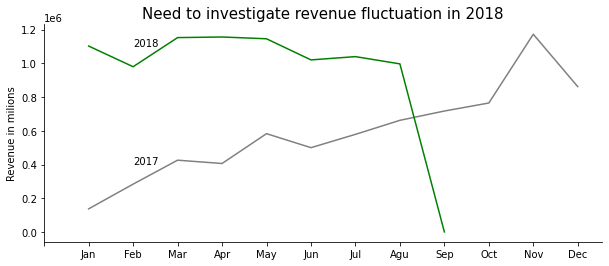

In [10]:
order_payment_by_month2 = order_payment_by_month.reset_index()
fig, ax = plt.subplots(figsize=(10, 4))
for year, color in zip([2017, 2018],['gray', 'green']):
    global ax
    year_data = order_payment_by_month2[order_payment_by_month2.year == year]
    ax.plot(year_data.month, year_data.amount, color=color)

ax.set_xticks(np.arange(0, 13))
ax.set_xticklabels(month_order)
ax.set_ylabel("Revenue in milions", fontsize=10)
ax.set_title("Need to investigate revenue fluctuation in 2018", fontsize=15)
ax.spines['top'].set_visible(False)
# ax.spines['bottom'].set_visible(False)
# ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.text(2,1.1e6, "2018")
ax.text(2,0.4e6, "2017")

# ax.legend()

### Insight

Monthly revenue increased in 2017 untill November when it reached its peak, then it started fluctuating. The reason for the subsequent fluctuation should be investigated.

## 2: How many orders were placed on Olist, and how does this vary by month or season?

In [11]:
order_count_total = orders.order_id.count()
order_count_total

99112

In [12]:
order_count = orders.groupby([(orders.year),(orders.month)]).agg(No_of_orders = ("order_id",'count'))

Text(2, 2500, '2017')

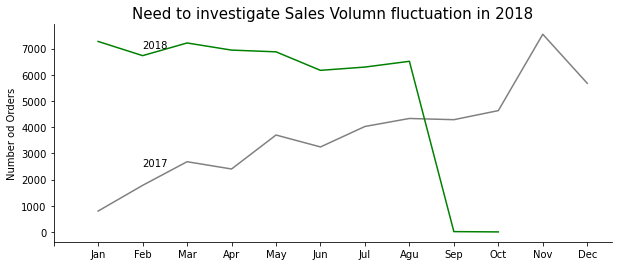

In [13]:
order_count_ = order_count.reset_index()
fig, ax = plt.subplots(figsize=(10, 4))
for year, color in zip([2017, 2018],['gray', 'green']):
    global ax
    year_data = order_count_[order_count_.year == year]
    ax.plot(year_data.month, year_data.No_of_orders, color=color)

ax.set_xticks(np.arange(0, 13))
ax.set_xticklabels(month_order)
ax.set_ylabel("Number od Orders", fontsize=10)
ax.set_title("Need to investigate Sales Volumn fluctuation in 2018", fontsize=15)
ax.spines['top'].set_visible(False)
# ax.spines['bottom'].set_visible(False)
# ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.text(2,7000, "2018")
ax.text(2,2500, "2017")

# ax.legend()

### Insight

Just like the monthly revenue, the sales volume increased up to a peak at november 2017 then started fluctuation. the reason for this fluctuation shoulde be checked.

## 3: What are the most popular product categories on Olist, and how do their sales volumes compare to each other?

In [14]:
#  JOINING PRODUCTS TO ORDERS AND PAYMENTS TO GET COST ASSOCIATED WITH PURCHASE OF A PRODUCT
order_items_product = orders.merge(order_items, on = 'order_id', how = 'left').merge(products, on = 'product_id')

In [15]:
# GROUP AND SORT TO SHOW THE TOP PRODUCTS AND THEIR SALES VOLUME
order_category_count = order_items_product.groupby('product_category_name_english').\
agg(sales_volume = ("product_id",'count')).sort_values('sales_volume', ascending=False)

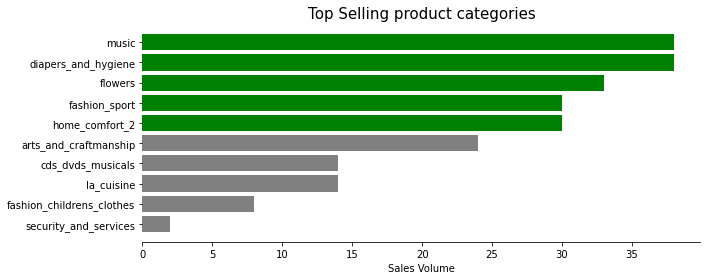

In [16]:
order_category_count_ = order_category_count.sort_values('sales_volume', ascending=True).head(10)
order_category_count_top = order_category_count_.head(5)
order_category_count_last = order_category_count_.tail(5)
fig, ax = plt.subplots(figsize=(10, 4))
# for year, color in zip([2017, 2018],['gray', 'green']):
#     global ax
#     year_data = order_count_[order_count_.year == year]
#     ax.barh(year_data.month, year_data.No_of_orders, color=color)

ax.barh(order_category_count_top.index, order_category_count_top.sales_volume, color="gray")
ax.barh(order_category_count_last.index, order_category_count_last.sales_volume, color="green")
# ax.set_xticks(np.arange(0, 13))
# ax.set_xticklabels(month_order)
ax.set_xlabel("Sales Volume", fontsize=10)
ax.set_title("Top Selling product categories", fontsize=15)
ax.spines['top'].set_visible(False)
# ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)

# ax.text(2,7000, "2018")
# ax.text(2,2500, "2017")

# ax.legend()

### Insight

While the top selling product categories bed_bath_table, health_beauty, sports shoud attract more investment, there should be an investigation as to why some other low performing products are so.

## 4: What is the average order value (AOV) on Olist, and how does this vary by product category or payment method?


Average Order Value is a measure of the average amount made anytime an order is placed over the given period. Its formula is Revenue divided by number of orders

In [17]:
a_o_v = round(order_items.amount.mean(), 2)
a_o_v

140.64

In [18]:
# COMBINE THE ORDERS, ITEMS, PRODUCTS AND PAYMENTS TABLES SO AS TO HAVE ALL RELEVANT DATA
order_items_product_payment = order_items_product.merge(order_payments, on = 'order_id')

In [19]:
a_o_v_product_cat = order_items_product.groupby('product_category_name_english').\
agg(AOV = ("amount", 'mean'))
# TOP 10 PRODUCT CATEGORIES BY AOV
a_o_v_product_cat.sort_values('AOV', ascending=False).head(10)

,AOV
product_category_name_english,
computers,1146.795222
small_appliances_home_oven_and_coffee,660.441711
home_appliances_2,520.663529
agro_industry_and_commerce,369.689009
musical_instruments,309.025544
small_appliances,304.372356
fixed_telephony,244.966641
construction_tools_safety,229.193918
furniture_bedroom,226.247798


In [20]:
a_o_v_payment_method = order_items_product_payment.groupby('payment_type').agg(AOV = ("amount", 'mean'))
a_o_v_payment_method

,AOV
payment_type,
boleto,124.283390
credit_card,146.583844
debit_card,127.332747
voucher,125.257441


### Insight

It can be seen that price is one of the reasons for the low sales performance of some product categories given the AOV of Olist and since the product categories with high AOV do not have high sales volume. Therefor perhapse pricing stratagy of the top AOV products should be checked.

## 5: How many sellers are active on Olist, and how does this number change over time?

In [21]:
# COMBINE THE ORDERS AND SELLERS TABLE TO GET MORE DATE AND GIVE CONTEXT TO THE DATA
seller_activity = orders.merge(order_items, on = 'order_id').merge(sellers, on = 'seller_id')

In [22]:
total_active_sellers = seller_activity.seller_id.nunique()
total_active_sellers

3068

In [23]:
active_seller_count_variation = seller_activity.groupby([(seller_activity.year),(seller_activity.month)]).\
agg(No_of_unique_sellers = ("seller_id",pd.Series.nunique))

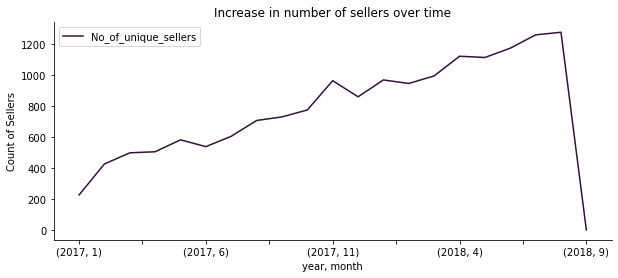

In [24]:
fig, ax = plt.subplots(figsize=(10, 4))
active_seller_count_variation.plot(title="Increase in number of sellers over time", xlabel="year, month",
                            ylabel="Count of Sellers", colormap = 'turbo', ax = ax)
ax.spines['top'].set_visible(False)
# ax.spines['bottom'].set_visible(False)
# ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)

### Insight

The number of active sellers increased over time almost constantly

## 6: What is the distribution of seller ratings on Olist, and how does this impact sales performance?

In [25]:
#  COMBINE REVIEWS TABLE TO THE ACTIVE SELLERS TABLE TO HAVE MORE DATA
seller_activity_reviews = seller_activity.merge(order_reviews, on = 'order_id', how = 'left')

In [26]:
# CREATE A NEW DATAFRAME OF THE SELLER ACTIVITY REVIEW TABLE ON mean review_scores 
# GROUPED BY seller_id's THEN RESET THE INDEX
seller_ratings_distribution = seller_activity_reviews.groupby('seller_id').\
review_score.mean().to_frame().\
reset_index().round({'review_score':0})
# GROUP THE NEW DATAFRAME BY review_score ON seller_id COUNT
seller_ratings_distribution = seller_ratings_distribution.groupby('review_score').\
agg(No_of_sellers = ("seller_id",'count'))

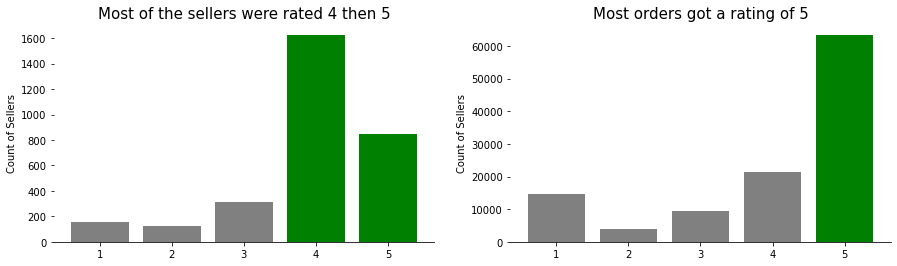

In [27]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(15, 4))
seller_ratings_distribution_top = seller_ratings_distribution.tail(2)
seller_ratings_distribution_last = seller_ratings_distribution.head(3)

ax1.bar(seller_ratings_distribution_top.index, seller_ratings_distribution_top.No_of_sellers, color="green")
ax1.bar(seller_ratings_distribution_last.index, seller_ratings_distribution_last.No_of_sellers, color="gray")

ax1.set_ylabel("Count of Sellers", fontsize=10)
ax1.set_title("Most of the sellers were rated 4 then 5", fontsize=15)
ax1.spines['top'].set_visible(False)
# ax.spines['bottom'].set_visible(False)
ax1.spines['left'].set_visible(False)
ax1.spines['right'].set_visible(False)

#------------------------------------------------------------

seller_activity_reviews_top = seller_activity_reviews.groupby('review_score').\
agg(No_of_sellers = ("seller_id",'count')).tail(1)
seller_activity_reviews_last = seller_activity_reviews.groupby('review_score').'
agg(No_of_sellers = ("seller_id",'count')).head(4)

ax2.bar(seller_activity_reviews_top.index, seller_activity_reviews_top.No_of_sellers, color="green")
ax2.bar(seller_activity_reviews_last.index, seller_activity_reviews_last.No_of_sellers, color="gray")

ax2.set_ylabel("Count of Sellers", fontsize=10)
ax2.set_title("Most orders got a rating of 5", fontsize=15)
ax2.spines['top'].set_visible(False)
# ax.spines['bottom'].set_visible(False)
ax2.spines['left'].set_visible(False)
ax2.spines['right'].set_visible(False)

### Insight

The above visual shows that most of the sellers were rated 4 or 5 and too most of the sales were highly rated showing a generally good performance of the sellers at Olist.

## 7: How many customers have made repeat purchases on Olist, and what percentage of total sales do they account for?

In [28]:
# Including the customer table so as to get more customer data
df_with_customers = order_items_product_payment.merge(customers, on = "customer_id", how = "left")
# Combine customer table with orders
df_customers = orders.merge(customers, on = "customer_id", how = "left")

In [29]:
# Get unique customers grouped by count of orders
unique_cust_count = df_customers.groupby('customer_unique_id').agg(count_ = ('order_id','count')).reset_index()
# Get unique customers wih more than one orders
unique_cust_count = unique_cust_count[unique_cust_count.count_ >1]
unique_customers = unique_cust_count['customer_unique_id']
# Join with larger table which returns only customers with repeted purchases
customers_with_repeted_purchases = df_with_customers.merge(unique_customers, on='customer_unique_id')

In [30]:
count_total_customers_with_repeted_purchases = customers_with_repeted_purchases.customer_unique_id.nunique()
count_total_customers_with_repeted_purchases

2977

In [31]:
revenue_from_customers_with_repeted_purchases = customers_with_repeted_purchases\
[customers_with_repeted_purchases.payment_value != np.nan].payment_value.sum()
round(revenue_from_customers_with_repeted_purchases, 2)

1339758.61

In [32]:
percentage_revenue_for_customers_with_repeted_purchases = (revenue_from_customers_with_repeted_purchases/total_revenue)*100
round(percentage_revenue_for_customers_with_repeted_purchases, 2)

8.54

### Insight

There is urgent need to take action to increase customers with repeted purchase since the churn rate is high.

## 8: What is the average customer rating for products sold on Olist, and how does this impact sales performance?

In [33]:
# Join review dataset to the big table to provide review data
order_items_product_payment_reviews = order_items_product_payment.merge(order_reviews, on='order_id', how='left')

In [34]:
general_average_rating = order_items_product_payment_reviews.review_score.mean()
round(general_average_rating,2)

4.02

In [35]:
average_rating_by_products = order_items_product_payment_reviews.groupby('product_category_name_english').agg(rating = ("review_score",'mean'), No_of_orders = ("order_id","count"))
average_rating_by_products.sort_values('No_of_orders', ascending=False).head(10)

,rating,No_of_orders
product_category_name_english,,
bed_bath_table,3.867384,11982
health_beauty,4.123747,9980
sports_leisure,4.093145,8986
furniture_decor,3.897269,8751
computers_accessories,3.929125,8127
housewares,4.046824,7368
watches_gifts,4.000644,6208
telephony,3.939130,4715
garden_tools,4.011123,4585


### Insight

The table shows that the top performing products by sales volumn had an average rating close to the average rating of 4.02 indicating a generaly good performance.

## 9: What is the average order cancellation rate on Olist, and how does this impact sales performance?

In [36]:
total_order_count = orders.order_id.count()
total_order_count

99112

In [37]:
cancelation_count = orders[orders.order_status == 'canceled'].order_status.count()
cancelation_count

599

In [38]:
cancelation_rate = round((cancelation_count/total_order_count)*100, 2)
cancelation_rate

0.6

### Insight

The cancelation rate is 0.6% which is impressively low.

## 10: What are the top-selling products on Olist, and how have their sales trends changed over time?

In [39]:
top_selling_products = order_items_product_payment_reviews.groupby('product_category_name_english').\
agg(count_ = ("order_id",'count')).sort_values("count_", ascending=False)
top_selling_products.head(5)

,count_
product_category_name_english,
bed_bath_table,11982
health_beauty,9980
sports_leisure,8986
furniture_decor,8751
computers_accessories,8127


In [40]:
top_selling_products_over_time = order_items_product_payment_reviews.\
groupby(['year', 'month'])['product_category_name_english'].agg(lambda x:x.value_counts().idxmax())

top_selling_products_over_time

year  month
2017  1                                furniture_decor
      2                                furniture_decor
      3                                furniture_decor
      4                                 bed_bath_table
      5                                 bed_bath_table
      6                                 bed_bath_table
      7                                 bed_bath_table
      8                                 bed_bath_table
      9                                 bed_bath_table
      10                                bed_bath_table
      11                                bed_bath_table
      12                                bed_bath_table
2018  1                                 bed_bath_table
      2                          computers_accessories
      3                                 bed_bath_table
      4                                 bed_bath_table
      5                                  health_beauty
      6                                  health_beaut

### Insight

The above table shows that during the years in review, the top selling product was sheared by the top 5 selling products during different months with bed_bath_table being top most of the time in 2017 and health_beauty being top mostly in 2018.

## 11: Which payment methods are most commonly used by Olist customers, and how does this vary by product category or geographic region?

In [41]:
# Add customer data to the big table to provide more custoer specific data
order_items_product_payment_reviews_customers= (order_items_product_payment_reviews.merge(customers, on = 'customer_id', how = 'left'))

In [42]:
common_payment_methods = order_items_product_payment_reviews_customers.groupby(['payment_type']).\
agg(No_of_customers = ('customer_id','count'))
common_payment_methods.sort_values('No_of_customers', ascending = False)

,No_of_customers
payment_type,
credit_card,86971
boleto,22947
voucher,6310
debit_card,1697


In [43]:
common_payment_methods_by_product_cat = order_items_product_payment_reviews_customers.groupby(['product_category_name_english'])['payment_type'].agg(lambda x:x.value_counts().idxmax())
common_payment_methods_by_product_cat.head(30)

product_category_name_english
agro_industry_and_commerce         credit_card
air_conditioning                   credit_card
art                                credit_card
arts_and_craftmanship              credit_card
audio                              credit_card
auto                               credit_card
baby                               credit_card
bed_bath_table                     credit_card
books_general_interest             credit_card
books_imported                     credit_card
books_technical                    credit_card
cds_dvds_musicals                  credit_card
christmas_supplies                 credit_card
cine_photo                         credit_card
computers                          credit_card
computers_accessories              credit_card
consoles_games                     credit_card
construction_tools_construction    credit_card
construction_tools_lights          credit_card
construction_tools_safety          credit_card
cool_stuff                    

In [44]:
common_payment_methods_by_state = order_items_product_payment_reviews_customers.groupby(['customer_state'])['payment_type'].agg(lambda x:x.value_counts().idxmax())
common_payment_methods_by_state

customer_state
AC    credit_card
AL    credit_card
AM    credit_card
AP    credit_card
BA    credit_card
CE    credit_card
DF    credit_card
ES    credit_card
GO    credit_card
MA    credit_card
MG    credit_card
MS    credit_card
MT    credit_card
PA    credit_card
PB    credit_card
PE    credit_card
PI    credit_card
PR    credit_card
RJ    credit_card
RN    credit_card
RO    credit_card
RR    credit_card
RS    credit_card
SC    credit_card
SE    credit_card
SP    credit_card
TO    credit_card
Name: payment_type, dtype: object

### Insight

It can be seen that most customers pay by credit card across both product category and state.

## 12: How do customer reviews and ratings affect sales and product performance on Olist?

This question has already been answered in No 8 above

## 13: Which product categories have the highest profit margins on Olist, and how can the company increase profitability across different categories?

No sufficient data to answer this question

## 14: How does Olist's marketing spend and channel mix impact sales and customer acquisition costs, and how can the company optimize its marketing strategy to increase ROI?

No sufficient Data to answer this question

## 15: Geolocation having high customer density. Calculate customer retention rate according to geolocations

In [45]:
order_items_product_payment_reviews_customers.groupby(['customer_state', 'customer_city']).\
agg(No_of_customers = ('customer_id','count')).sort_values('No_of_customers', ascending = False).head(10)

,,No_of_customers
customer_state,customer_city,
SP,sao paulo,18686
RJ,rio de janeiro,8214
MG,belo horizonte,3255
DF,brasilia,2476
PR,curitiba,1804
SP,campinas,1732
RS,porto alegre,1660
BA,salvador,1537
SP,guarulhos,1403


In [46]:
# Streamline the table to only relevant columns
customer_date_and_geo_data = order_items_product_payment_reviews_customers[
    ['customer_id','customer_unique_id', 'customer_state', 'year']]
# Get customers that made puchases in 2017 and 2018 seperately
customers_2017 = customer_date_and_geo_data[customer_date_and_geo_data.year == 2017].groupby('customer_unique_id')\
['customer_id'].count().to_frame().reset_index()
customers_2018 = customer_date_and_geo_data[customer_date_and_geo_data.year == 2018].groupby('customer_unique_id')\
['customer_id'].count().to_frame().reset_index()
# Combine them to get retained customers
retained_customers = customers_2018.merge(customers_2017, on = 'customer_unique_id')
# Combine with other customer data to get other relevant data of retained customers
customer_date_and_geo_data_ = customer_date_and_geo_data.merge(retained_customers, on = 'customer_unique_id')
# Group by state to get number of retained customers in each state
retained_cosumer_location = customer_date_and_geo_data_.groupby(['customer_state'])\
['customer_id'].count().to_frame().reset_index()
# Group by state to get overall customers in each state
current_consumer_locations = customer_date_and_geo_data.groupby(['customer_state'])\
['customer_id'].count().to_frame().reset_index()
# Combine to have both data in one table
consumer_location_data = current_consumer_locations.\
merge(retained_cosumer_location, on = 'customer_state', how = 'left')
# Rename some columns
consumer_location_data = consumer_location_data.\
rename(columns = {'customer_id_x':'all_customers', 'customer_id_y':'retained_customers'})
# Fill Nan values with 0
consumer_location_data = consumer_location_data.fillna(0)

In [47]:
# Create new column to calculate the retention rate then sort in decending order of retention rate
consumer_location_data['retention_rate'] = round(
    (consumer_location_data.retained_customers/consumer_location_data.all_customers)*100,2)
consumer_location_data.sort_values('retention_rate', ascending = False)

,customer_state,all_customers,retained_customers,retention_rate
2,AM,172,9.0,5.23
20,RO,286,14.0,4.90
0,AC,95,4.0,4.21
9,MA,840,27.0,3.21
24,SE,394,11.0,2.79
26,TO,339,8.0,2.36
15,PE,1896,36.0,1.90
18,RJ,15361,290.0,1.89
25,SP,49737,892.0,1.79
10,MG,13665,220.0,1.61


### Insight

It can be seen that the top three states by retention rate are, AM, RO anc AC, though they do not have a high number of customers. Effort shold be made to improve customer retention in states with very high number of customers like SP, RJ and MG.